<a href="https://colab.research.google.com/github/Juwdohr/WGU-EDA-D207/blob/main/EDA_EXPLORATORY_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns

import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

# Setup

In [ ]:
data = pd.read_csv('/content/churn_clean.csv', index_col='CaseOrder')
data['Zip'] = data['Zip'].apply(str)
data['Lat'] = data['Lat'].apply(str)
data['Lng'] = data['Lng'].apply(str)
data.head()

Customer_id                           Interaction  \
CaseOrder                                                     
1             K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
2             S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
3             K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
4              D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
5             K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                        UID         City State  \
CaseOrder                                                        
1          e885b299883d4f9fb18e39c75155d990  Point Baker    AK   
2          f2de8bef964785f41a2959829830fb8a  West Branch    MI   
3          f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR   
4          dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA   
5          aabb64a116e83fdc4befc1fbab1663f9    Needville    TX   

                          County    Zip       Lat         Lng  Population  \
CaseOrder                                                                   
1          Prince of Wales-Hyder  99927    56.251  -133.37571          38   
2                         Ogemaw  48661  44.32893    -84.2408       10446   
3                        Yamhill  97148  45.35589  -123.24657        3735   
4                      San Diego  92014  32.96687  -117.24798       13863   
5                      Fort Bend  77461  29.38012   -95.80673       11352   

           ... MonthlyCharge Bandwidth_GB_Year Item1  Item2  Item3  Item4  \
CaseOrder  ...                                                              
1          ...    172.455519        904.536110     5      5      5      3   
2          ...    242.632554        800.982766     3      4      3      3   
3          ...    159.947583       2054.706961     4      4      2      4   
4          ...    119.956840       2164.579412     4      4      4      2   
5          ...    149.948316        271.493436     4      4      4      3   

          Item5 Item6 Item7  Item8  
CaseOrder                           
1             4     4     3      4  
2             4     3     4      4  
3             4     3     3      3  
4             5     4     3      3  
5             4     4     4      5  

[5 rows x 49 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  object 
 7   Lat                   10000 non-null  object 
 8   Lng                   10000 non-null  object 
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

In [ ]:
data.describe()

Population    Children           Age         Income  \
count   10000.000000  10000.0000  10000.000000   10000.000000   
mean     9756.562400      2.0877     53.078400   39806.926771   
std     14432.698671      2.1472     20.698882   28199.916702   
min         0.000000      0.0000     18.000000     348.670000   
25%       738.000000      0.0000     35.000000   19224.717500   
50%      2910.500000      1.0000     53.000000   33170.605000   
75%     13168.000000      3.0000     71.000000   53246.170000   
max    111850.000000     10.0000     89.000000  258900.700000   

       Outage_sec_perweek         Email      Contacts  Yearly_equip_failure  \
count        10000.000000  10000.000000  10000.000000          10000.000000   
mean            10.001848     12.016000      0.994200              0.398000   
std              2.976019      3.025898      0.988466              0.635953   
min              0.099747      1.000000      0.000000              0.000000   
25%              8.018214     10.000000      0.000000              0.000000   
50%             10.018560     12.000000      1.000000              0.000000   
75%             11.969485     14.000000      2.000000              1.000000   
max             21.207230     23.000000      7.000000              6.000000   

             Tenure  MonthlyCharge  Bandwidth_GB_Year         Item1  \
count  10000.000000   10000.000000       10000.000000  10000.000000   
mean      34.526188     172.624816        3392.341550      3.490800   
std       26.443063      42.943094        2185.294852      1.037797   
min        1.000259      79.978860         155.506715      1.000000   
25%        7.917694     139.979239        1236.470827      3.000000   
50%       35.430507     167.484700        3279.536903      3.000000   
75%       61.479795     200.734725        5586.141370      4.000000   
max       71.999280     290.160419        7158.981530      7.000000   

              Item2         Item3         Item4         Item5         Item6  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       3.505100      3.487000      3.497500      3.492900      3.497300   
std        1.034641      1.027977      1.025816      1.024819      1.033586   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        3.000000      3.000000      3.000000      3.000000      3.000000   
50%        4.000000      3.000000      3.000000      3.000000      3.000000   
75%        4.000000      4.000000      4.000000      4.000000      4.000000   
max        7.000000      8.000000      7.000000      7.000000      8.000000   

              Item7         Item8  
count  10000.000000  10000.000000  
mean       3.509500      3.495600  
std        1.028502      1.028633  
min        1.000000      1.000000  
25%        3.000000      3.000000  
50%        4.000000      3.000000  
75%        4.000000      4.000000  
max        7.000000      8.000000

# Data Analysis

## Heatmap

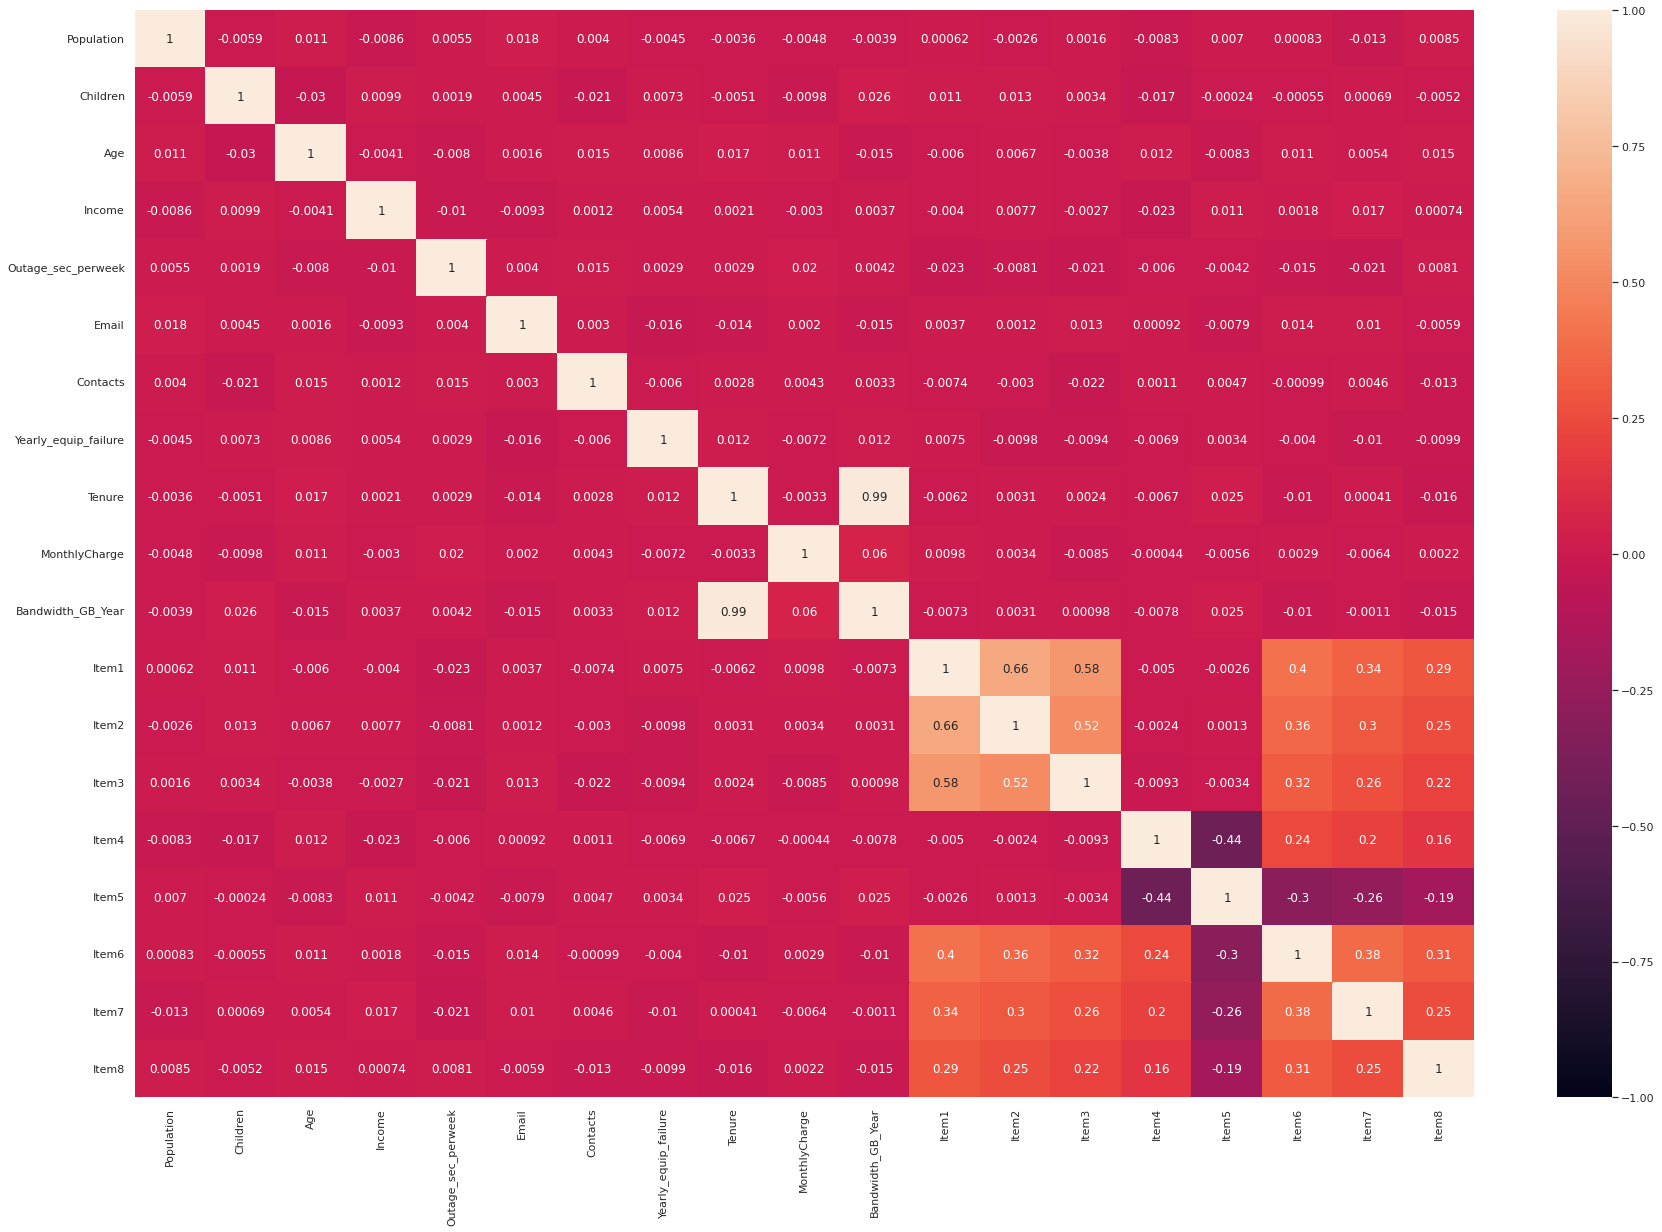

In [ ]:
sns.set(rc = {'figure.figsize':( 30,20 )})
sns.heatmap(data.corr(), vmin=-1, vmax=1, Cmap=sns.diverging_palette(10, 100, as_cmap=True), annot=True)

## ANOVA

B. Describe the data analysis by doing the following:

1. Using one of the following techniques, write code (in either Python or R) to run the analysis of the data set:
    * chi-square
    * t-test
    * ANOVA **<-- Chosen**
2.  Provide the output and the results of any calculations from the analysis you performed.
3.  Justify why you chose this analysis technique.
    
    As I was looking at multiple categorical variables at the same time, I chose a two-way ANOVA as this could show me the how the Churn and Contracts interacted with each of the continous catgories. This allowed me to see how the services were affecting the churn based upon the contracts that they had. I was then able to find which had the higher significance value.

In [ ]:
churn_services_data = data[['Churn','Contract', 'Tenure', 'Email', 'Contacts', 'Outage_sec_perweek', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year']].copy()
churn_services_data.head()

Churn        Contract     Tenure  Email  Contacts  \
CaseOrder                                                     
1            No        One year   6.795513     10         0   
2           Yes  Month-to-month   1.156681     12         0   
3            No        Two Year  15.754144      9         0   
4            No        Two Year  17.087227     15         2   
5           Yes  Month-to-month   1.670972     16         2   

           Outage_sec_perweek  Yearly_equip_failure  MonthlyCharge  \
CaseOrder                                                            
1                    7.978323                     1     172.455519   
2                   11.699080                     1     242.632554   
3                   10.752800                     1     159.947583   
4                   14.913540                     0     119.956840   
5                    8.147417                     1     149.948316   

           Bandwidth_GB_Year  
CaseOrder                     
1                 904.536110  
2                 800.982766  
3                2054.706961  
4                2164.579412  
5                 271.493436

In [ ]:
churn_services_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Churn                 10000 non-null  object 
 1   Contract              10000 non-null  object 
 2   Tenure                10000 non-null  float64
 3   Email                 10000 non-null  int64  
 4   Contacts              10000 non-null  int64  
 5   Outage_sec_perweek    10000 non-null  float64
 6   Yearly_equip_failure  10000 non-null  int64  
 7   MonthlyCharge         10000 non-null  float64
 8   Bandwidth_GB_Year     10000 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 781.2+ KB


In [ ]:
def display_two_way_anova(column_name:str, df) -> None:
    model = ols(f'{column_name} ~ C(Churn) + C(Contract) + C(Churn):C(Contract)', data=df).fit()
    print(sm.stats.anova_lm(model, typ=2))
    # model = ols(f'{column_name} ~ C(Churn) + C(Tenure) + C(Churn):C(Tenure)', data=df).fit()
    # print(sm.stats.anova_lm(model, typ=2))


def create_boxplot(column_name:str, df) -> None:
    plt.subplots(figsize=(20, 6))
    sns.boxplot(x="Contract", y=column_name, hue="Churn", data=df)
    plt.show()


def show_interaction(column_name:str, df) -> None:
    fig, ax = plt.subplots(figsize=(20, 6))
    fig = interaction_plot(
        x = df['Contract'].values,
        trace = df['Churn'].values,
        response = df[column].values,
        colors=["red", "blue"],
        markers=["D", "^"],
        ms=10,
        ax=ax
    )
    plt.show()

                            sum_sq      df            F        PR(>F)
C(Churn)              1.750702e+06     1.0  3341.541202  0.000000e+00
C(Contract)           1.055253e+05     2.0   100.707343  4.991690e-44
C(Churn):C(Contract)  2.232601e+03     2.0     2.130667  1.188120e-01
Residual              5.236063e+06  9994.0          NaN           NaN


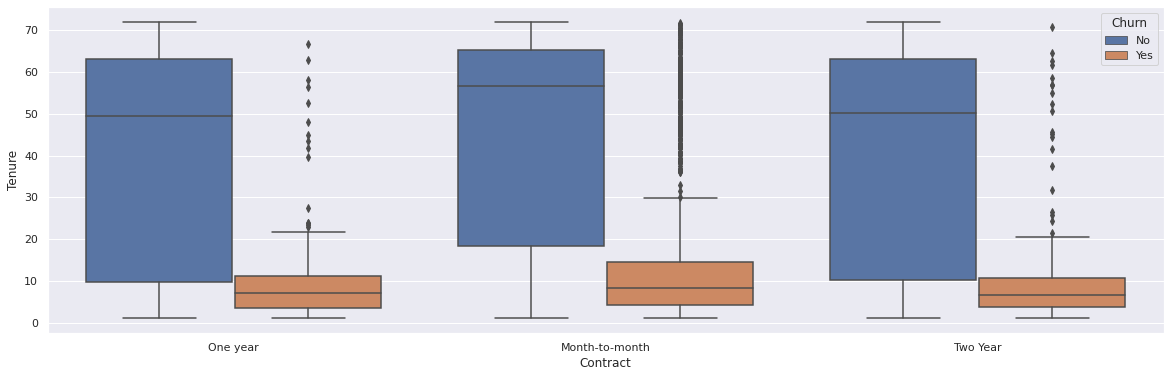

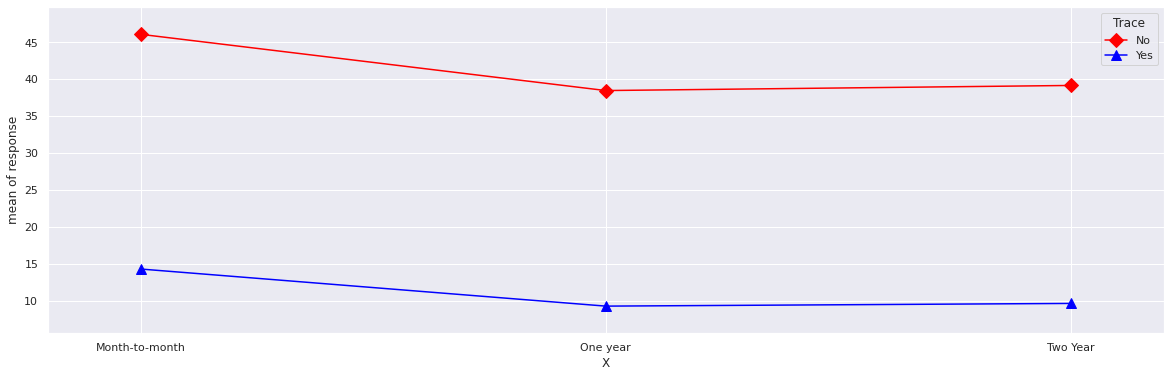

                            sum_sq      df         F    PR(>F)
C(Churn)                 10.818868     1.0  1.181464  0.277084
C(Contract)              13.635095     2.0  0.744504  0.474996
C(Churn):C(Contract)      7.114450     2.0  0.388463  0.678108
Residual              91516.780477  9994.0       NaN       NaN


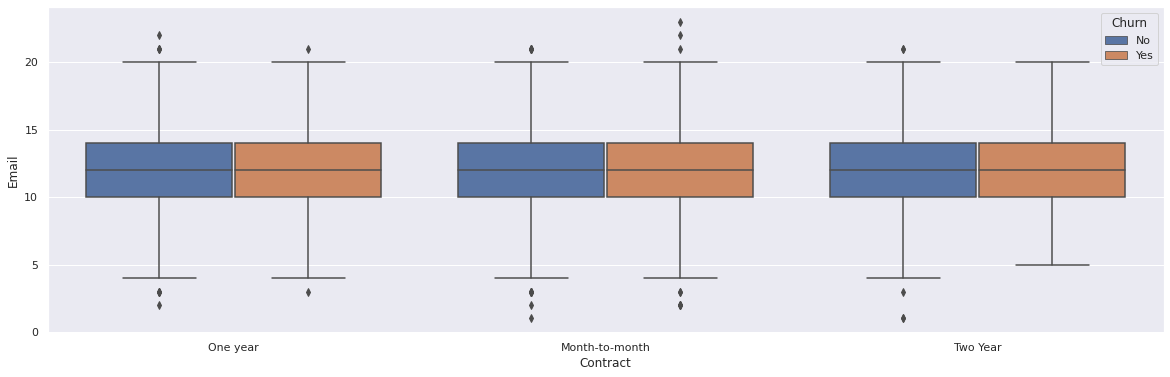

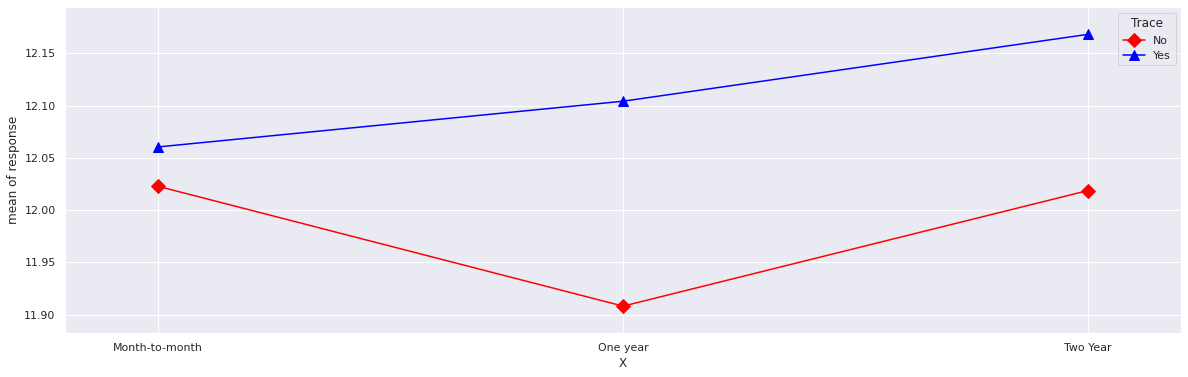

                           sum_sq      df         F    PR(>F)
C(Churn)                 1.026904     1.0  1.050911  0.305322
C(Contract)              0.907467     2.0  0.464341  0.628563
C(Churn):C(Contract)     2.339866     2.0  1.197284  0.302057
Residual              9765.699277  9994.0       NaN       NaN


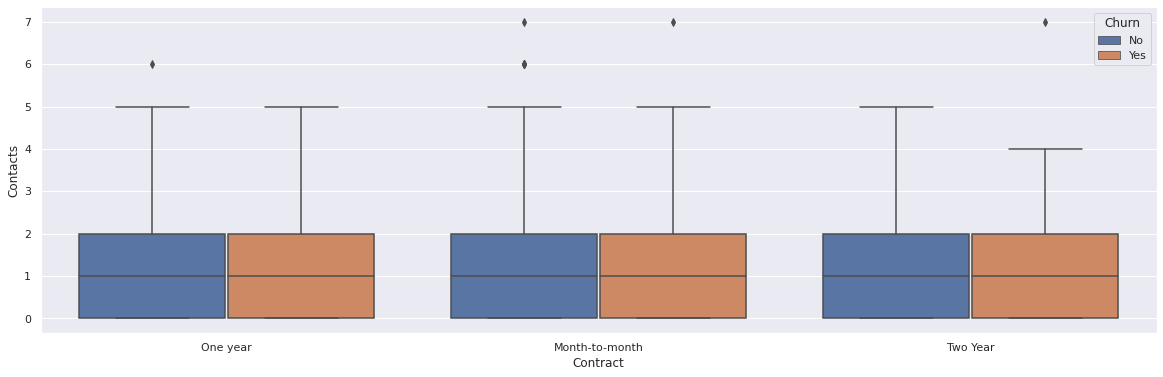

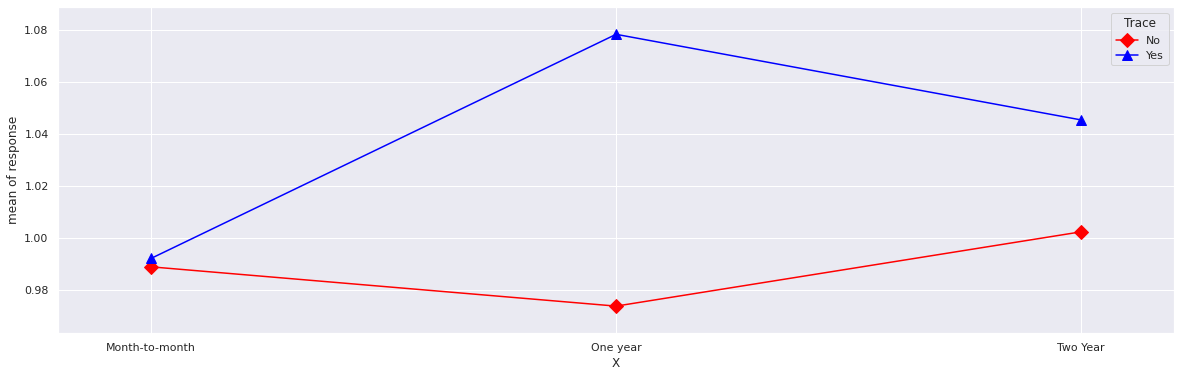

                            sum_sq      df         F    PR(>F)
C(Churn)                  0.525461     1.0  0.059333  0.807558
C(Contract)              21.418317     2.0  1.209243  0.298467
C(Churn):C(Contract)     28.907636     2.0  1.632078  0.195575
Residual              88507.717268  9994.0       NaN       NaN


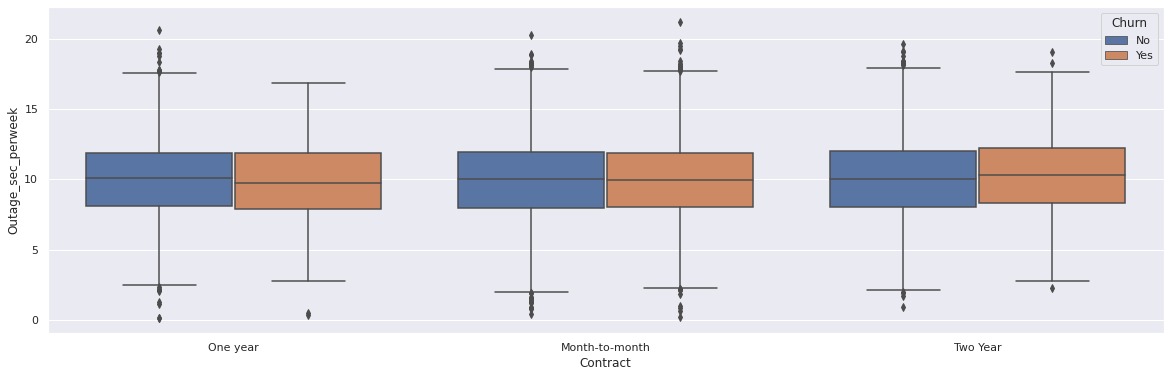

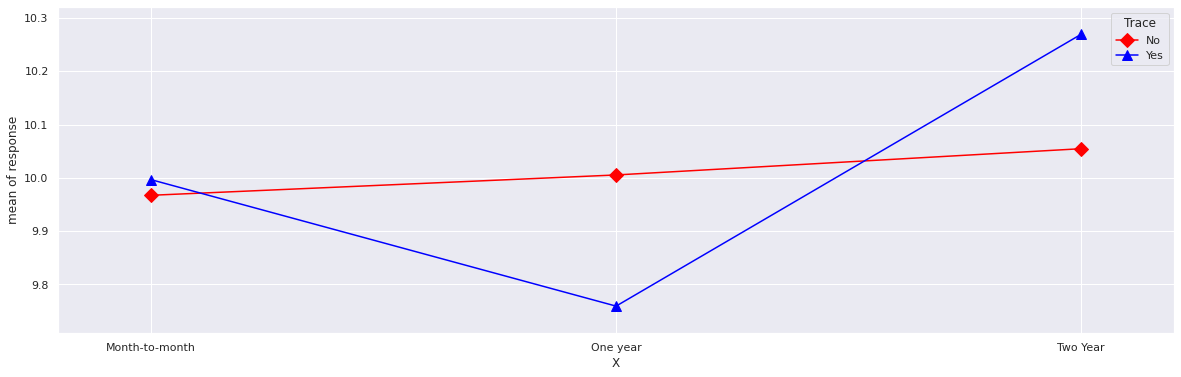

                           sum_sq      df         F    PR(>F)
C(Churn)                 1.009074     1.0  2.494808  0.114254
C(Contract)              0.605590     2.0  0.748622  0.473044
C(Churn):C(Contract)     0.060619     2.0  0.074937  0.927803
Residual              4042.267946  9994.0       NaN       NaN


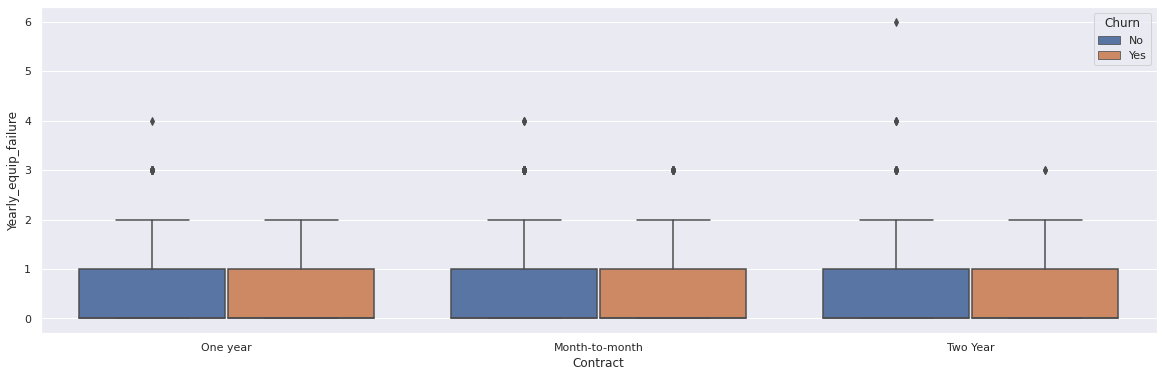

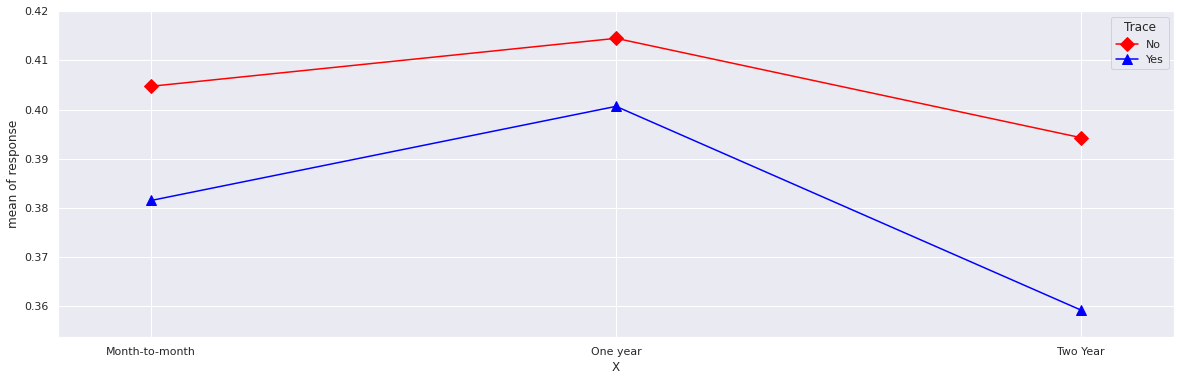

                            sum_sq      df            F        PR(>F)
C(Churn)              2.810455e+06     1.0  1814.105186  0.000000e+00
C(Contract)           2.495177e+05     2.0    80.529905  2.018956e-35
C(Churn):C(Contract)  1.422077e+05     2.0    45.896435  1.440168e-20
Residual              1.548294e+07  9994.0          NaN           NaN


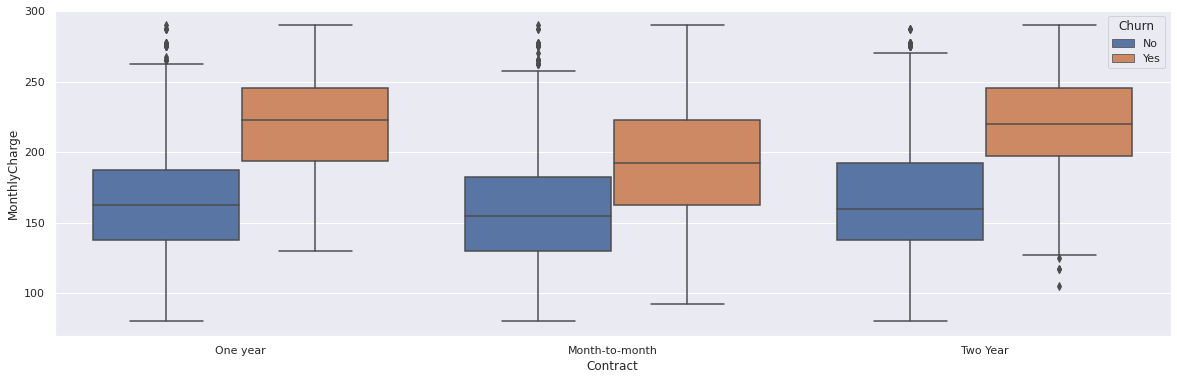

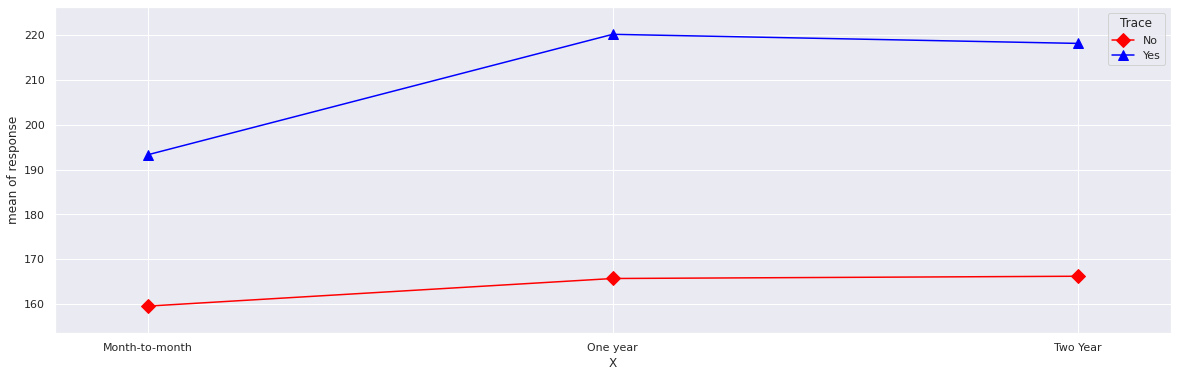

                            sum_sq      df            F        PR(>F)
C(Churn)              9.850461e+09     1.0  2601.144328  0.000000e+00
C(Contract)           5.561580e+08     2.0    73.430430  2.195898e-32
C(Churn):C(Contract)  3.248288e+07     2.0     4.288767  1.374710e-02
Residual              3.784700e+10  9994.0          NaN           NaN


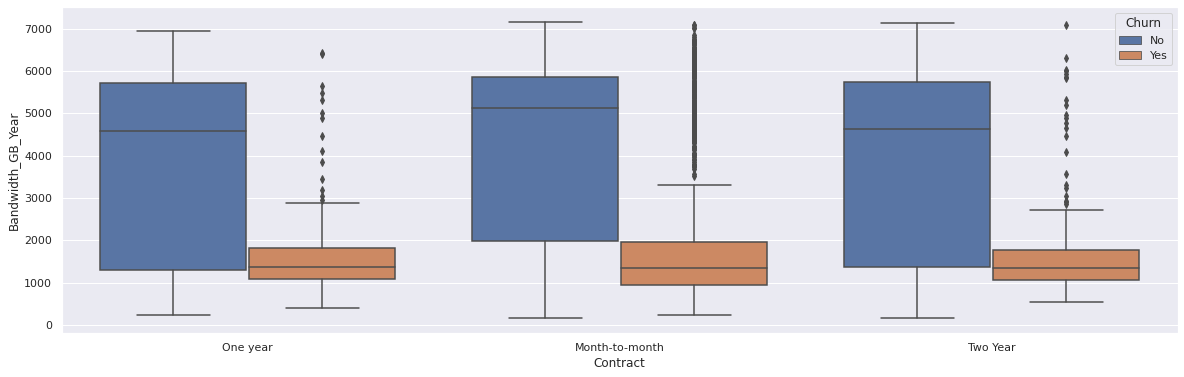

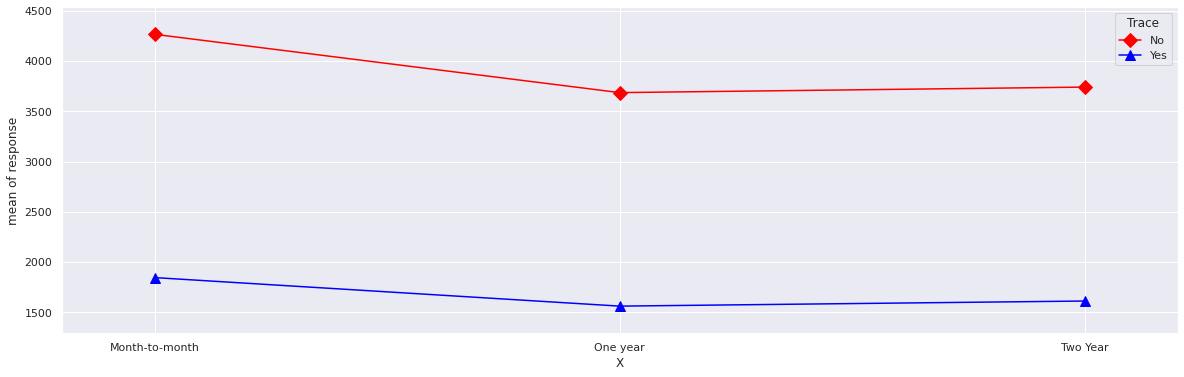

In [ ]:
for column in churn_services_data:
    if churn_services_data[column].dtype != object:
        display_two_way_anova(column, churn_services_data)
        create_boxplot(column, churn_services_data)
        show_interaction(column, churn_services_data)

## Univariate Distribution
C. Identify the distribution of two continuous variables and two categorical variables using univariate statistics from your cleaned and prepared data. 

1. Represent your findings in Part C, visually as part of your submission.

* _Note: To draw a graph or visualization, you may use one or a combination of the following:_
    - _A spreadsheet program, such as Excel (*.xls)_
    - _A graphics program, such as Paint (*.jpeg, *.gif)_
    - _A word-processing program, such as Word (*.rtf)_
    - _A scanned hand-drawn graph (*.jpeg, *.gif)_

In [ ]:
def display_histogram(column_name: str, df: DataFrame) -> None:
    plt.title(f'Column: {column_name}')
    plt.hist(df[column_name])
    plt.xticks(rotation=45, ha='right');
    plt.show()

def display_boxplot(column_name: str, df: DataFrame) -> None:
    boxplot = sns.boxplot(x=column_name, data=df)
    plt.title(f'Column: {column_name}')
    plt.xticks(rotation=45, ha='right');
    plt.show()

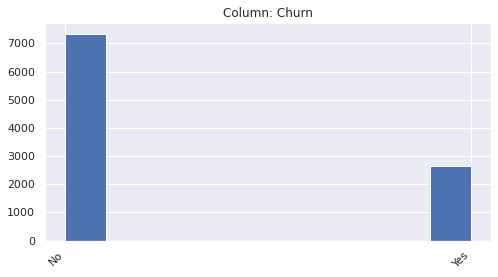

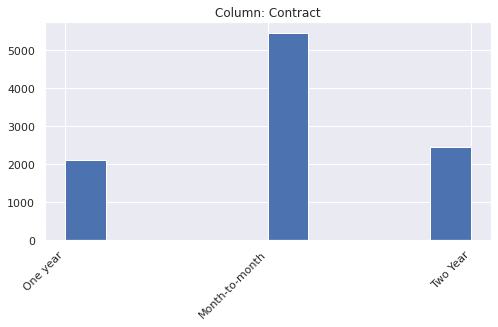

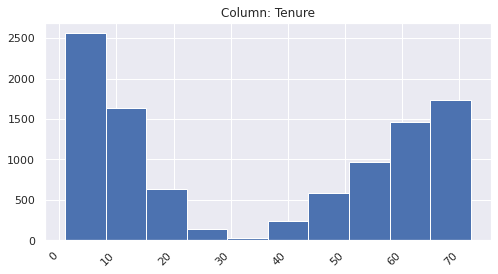

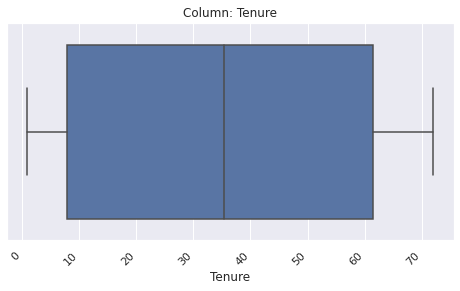

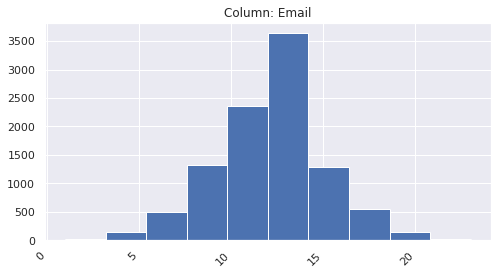

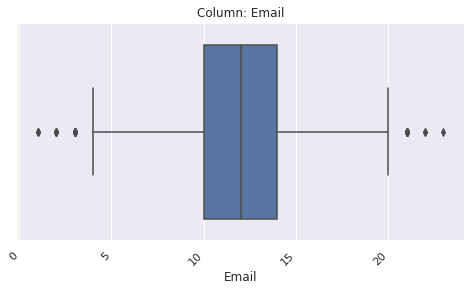

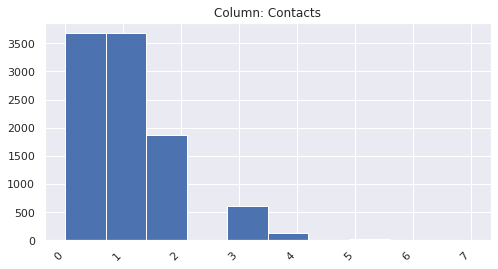

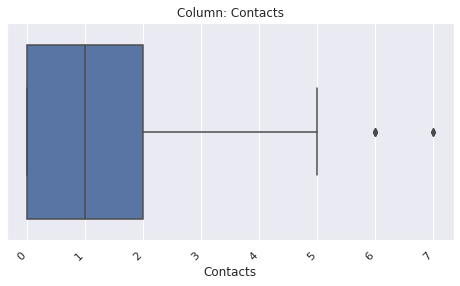

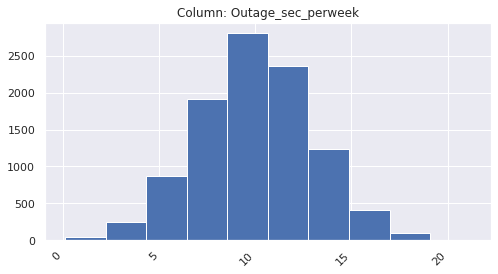

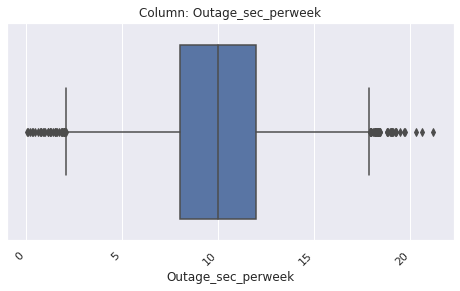

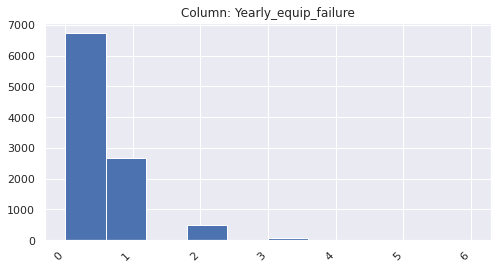

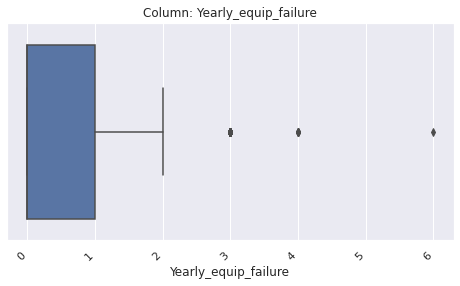

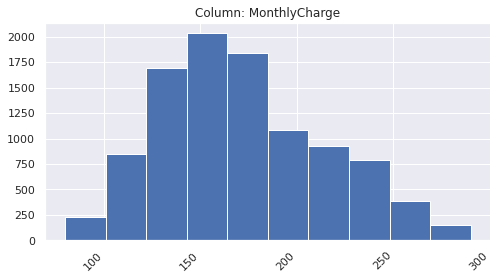

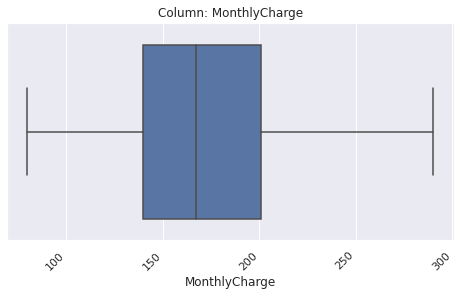

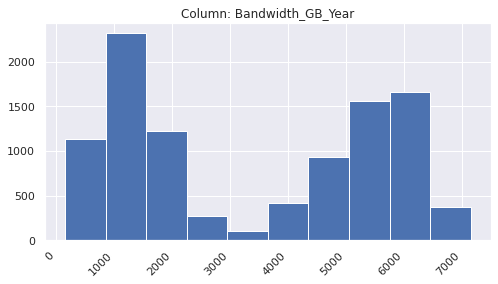

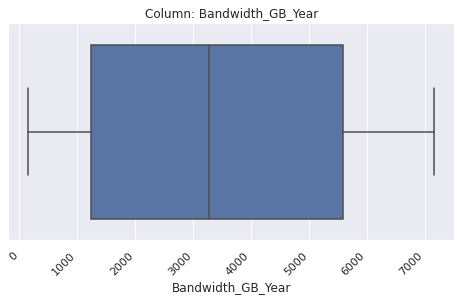

In [ ]:
for column in churn_services_data:
    plt.figure(figsize=(8,4))
    display_histogram(column, churn_services_data)
    if churn_services_data[column].dtype != object:
        plt.figure(figsize=(8,4))
        display_boxplot(column, churn_services_data)

## Bivariate Distrubution
D. Identify the distribution of two continuous variables and two categorical variables using bivariate statistics from your cleaned and prepared data.

1. Represent your findings in Part D, visually as part of your submission.

* _Note: To draw a graph or visualization, you may use one or a combination of the following:_
    - _A spreadsheet program, such as Excel (*.xls)_
    - _A graphics program, such as Paint (*.jpeg, *.gif)_
    - _A word-processing program, such as Word (*.rtf)_
    - _A scanned hand-drawn graph (*.jpeg, *.gif)_

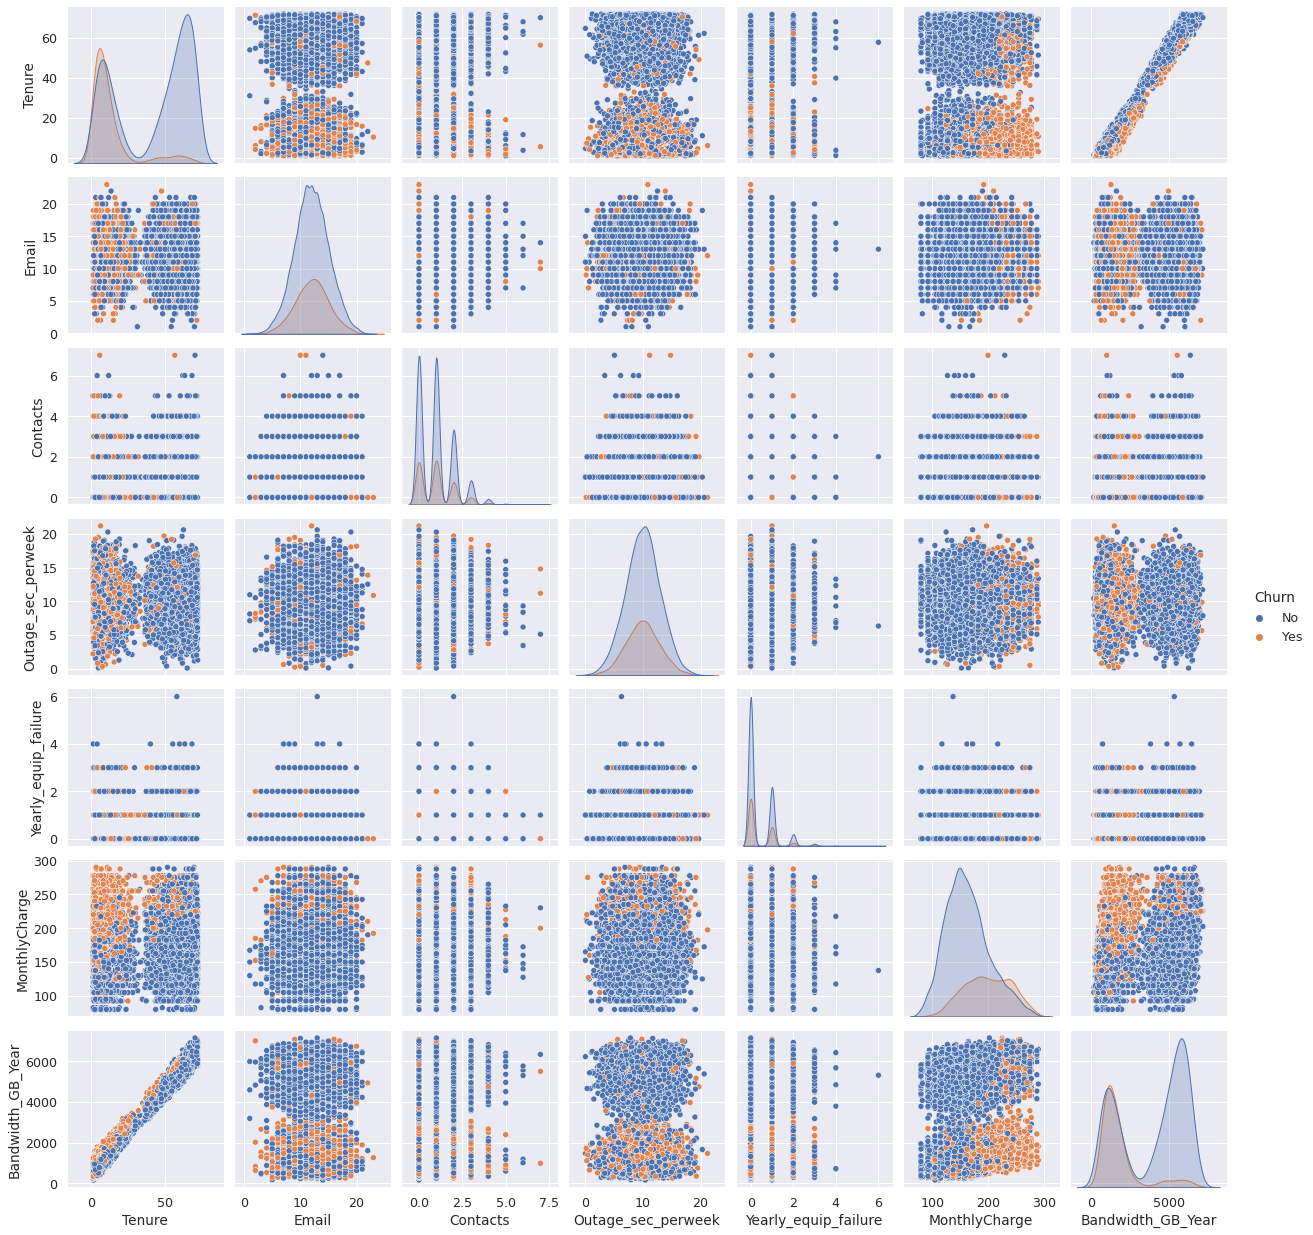

In [ ]:
sns.set(font_scale=1.15)
sns.pairplot(churn_services_data, hue='Churn')

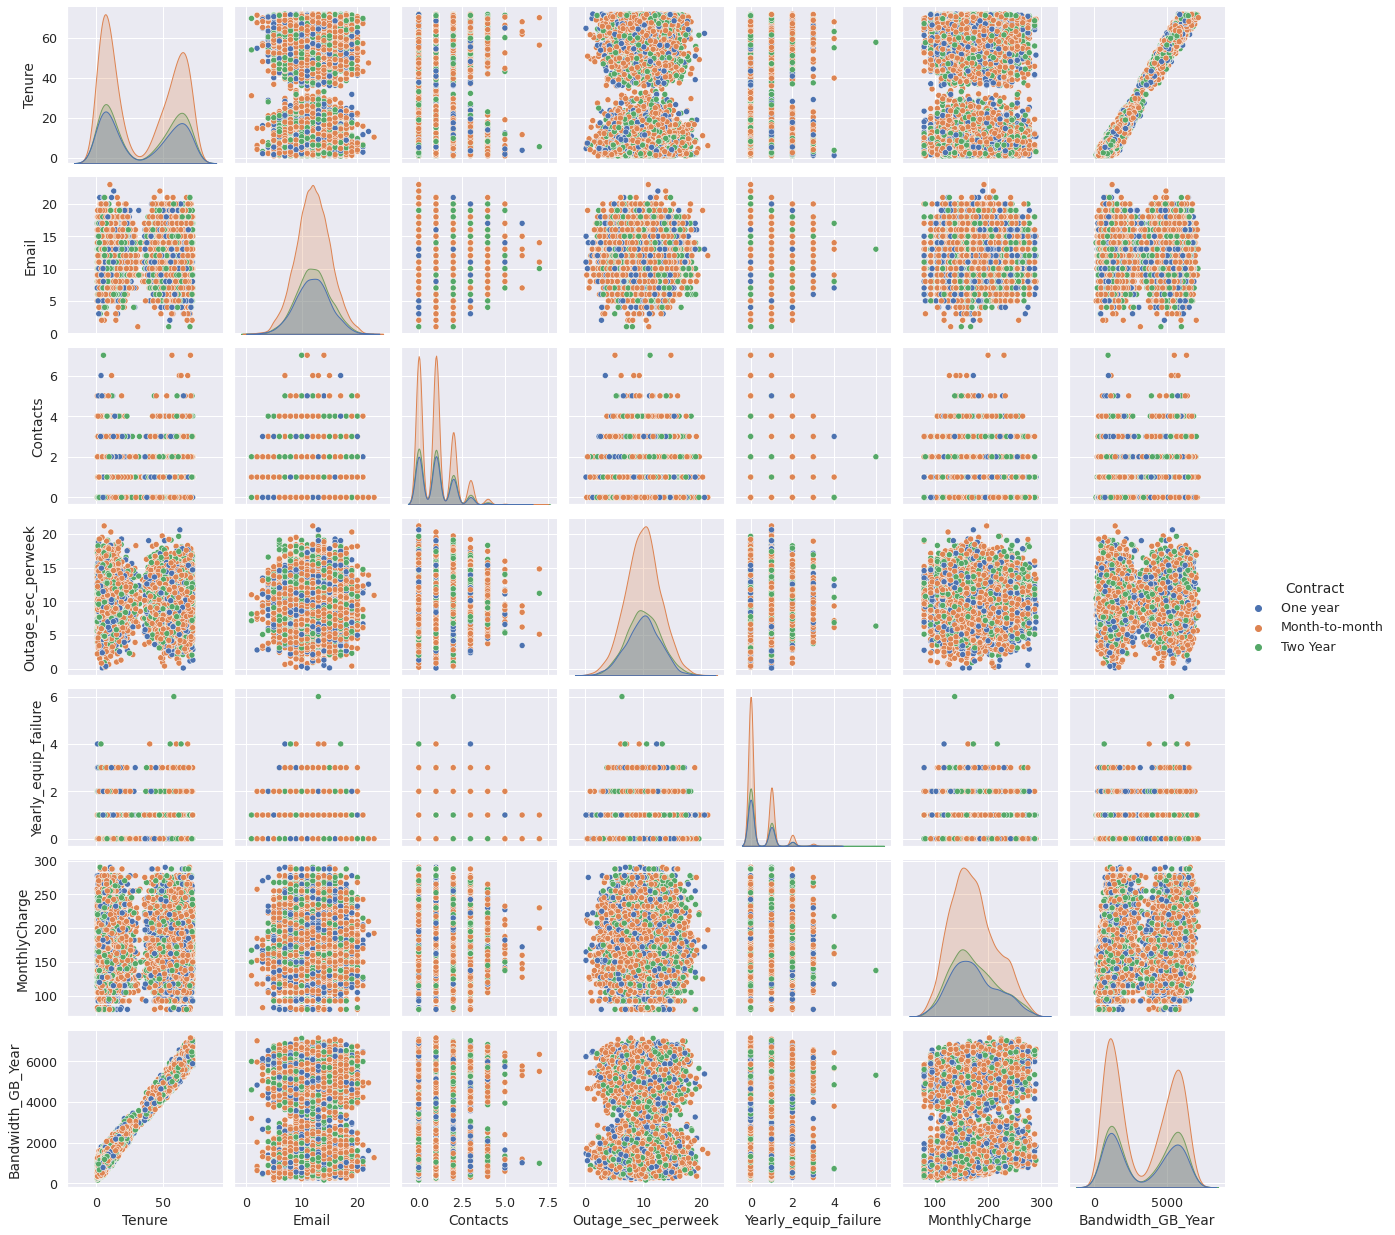

In [ ]:
sns.set(font_scale=1.15)
sns.pairplot(churn_services_data, hue='Contract')

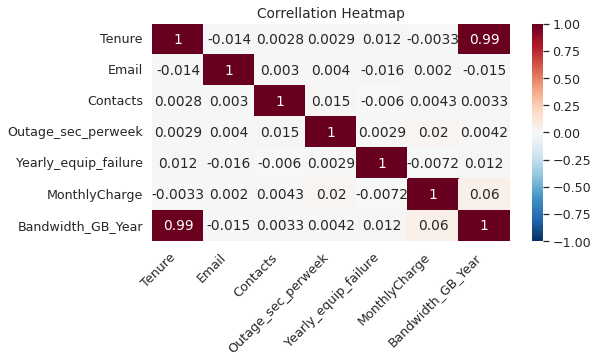

In [ ]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    churn_services_data.corr(),        
    cmap='RdBu_r', 
    annot=True,
    vmin=-1, vmax=1);
plt.title('Correllation Heatmap')
plt.xticks(rotation=45, ha='right');
plt.show()

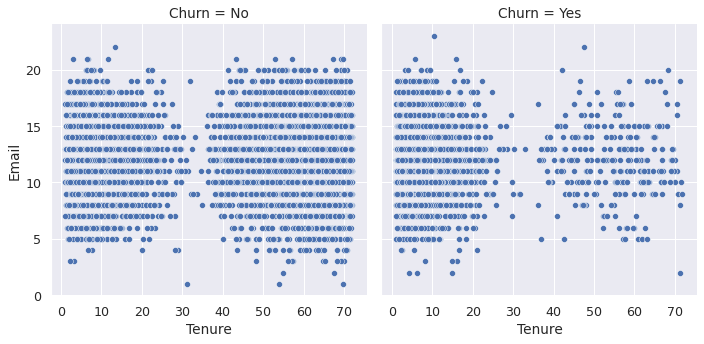

<Figure size 576x288 with 0 Axes>

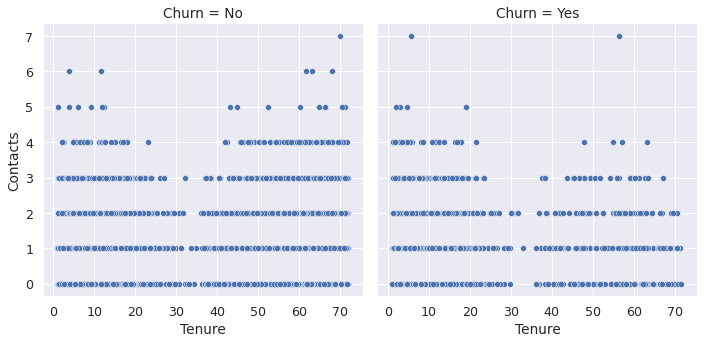

<Figure size 576x288 with 0 Axes>

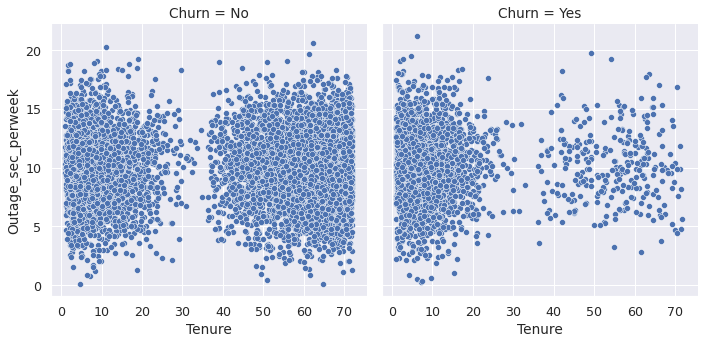

<Figure size 576x288 with 0 Axes>

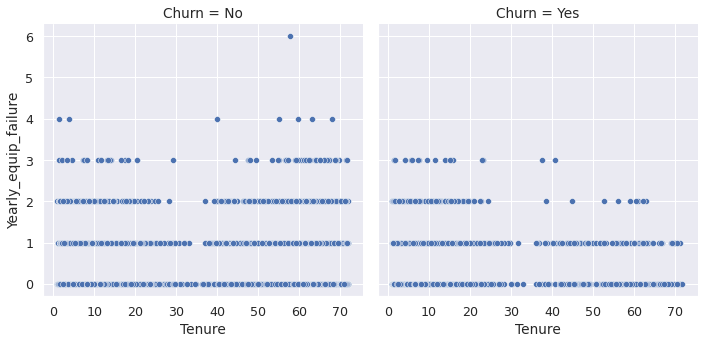

<Figure size 576x288 with 0 Axes>

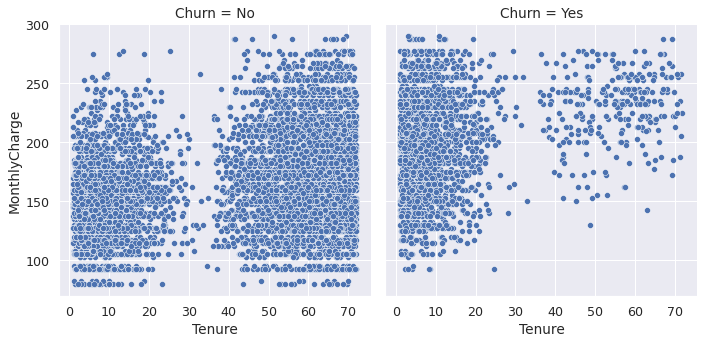

<Figure size 576x288 with 0 Axes>

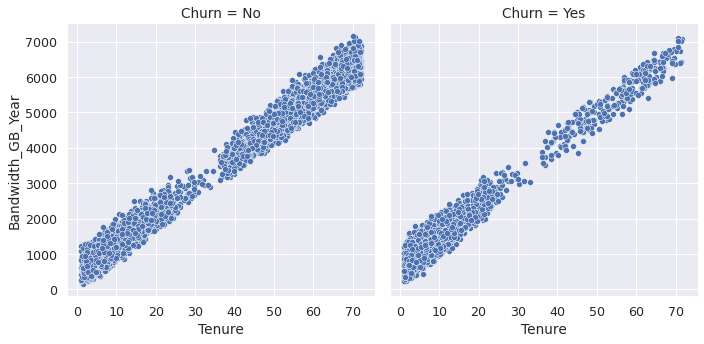

<Figure size 576x288 with 0 Axes>

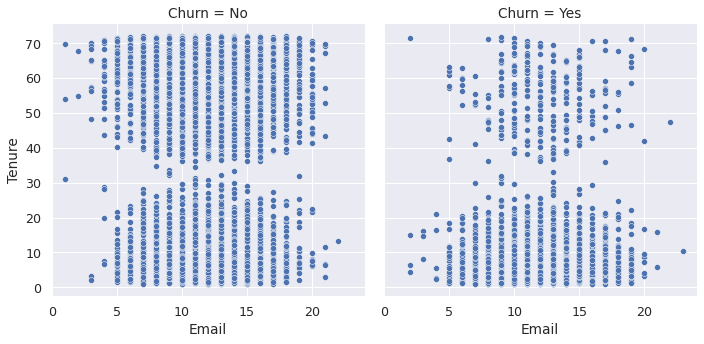

<Figure size 576x288 with 0 Axes>

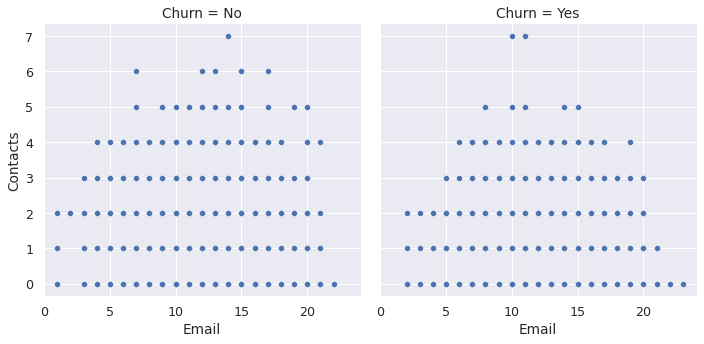

<Figure size 576x288 with 0 Axes>

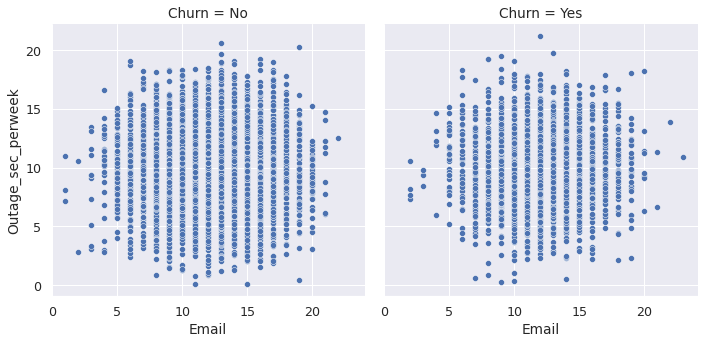

<Figure size 576x288 with 0 Axes>

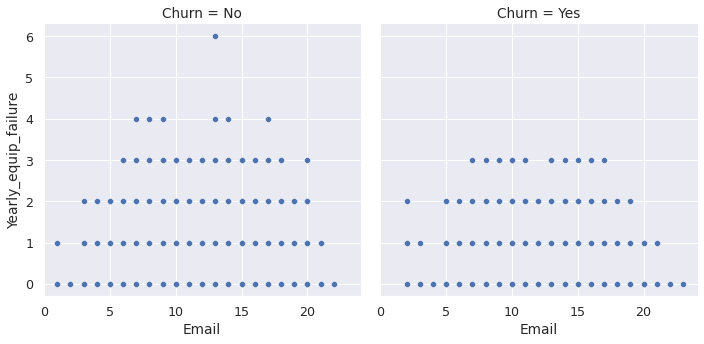

<Figure size 576x288 with 0 Axes>

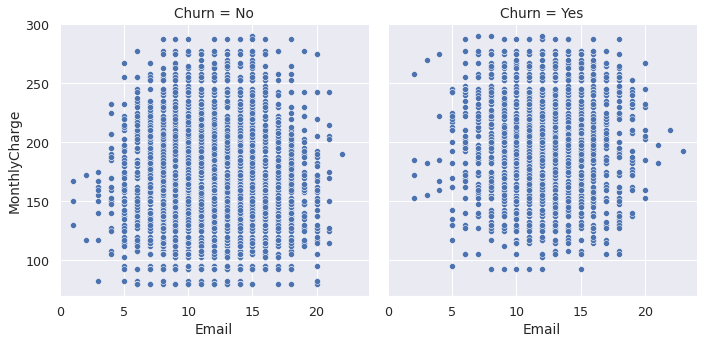

<Figure size 576x288 with 0 Axes>

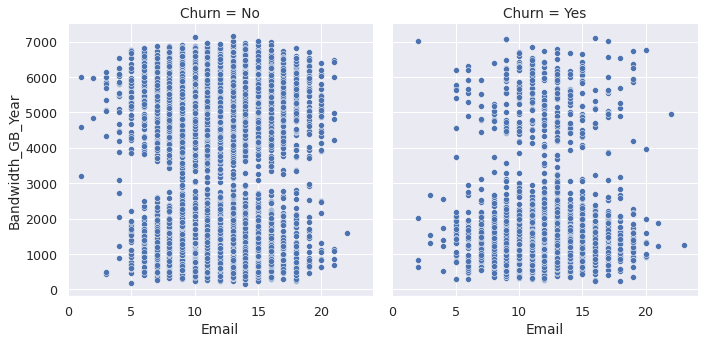

<Figure size 576x288 with 0 Axes>

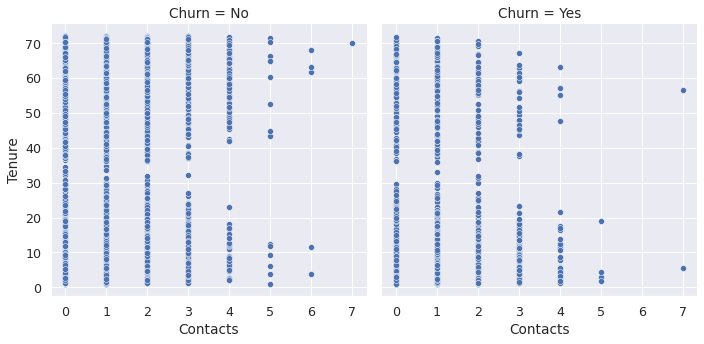

<Figure size 576x288 with 0 Axes>

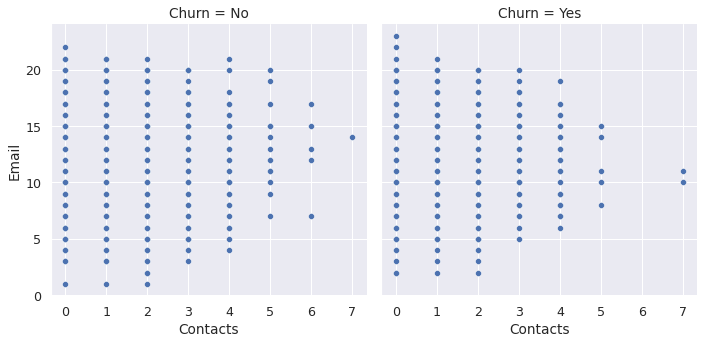

<Figure size 576x288 with 0 Axes>

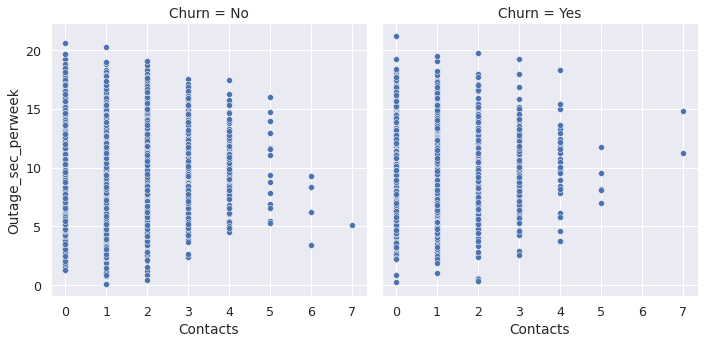

<Figure size 576x288 with 0 Axes>

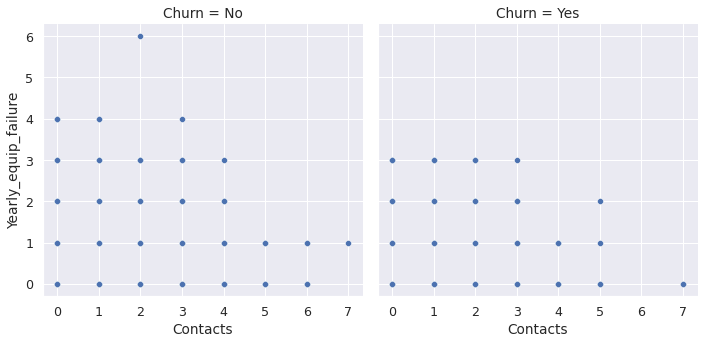

<Figure size 576x288 with 0 Axes>

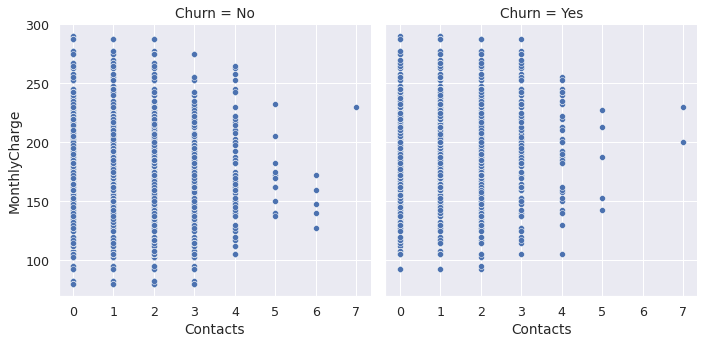

<Figure size 576x288 with 0 Axes>

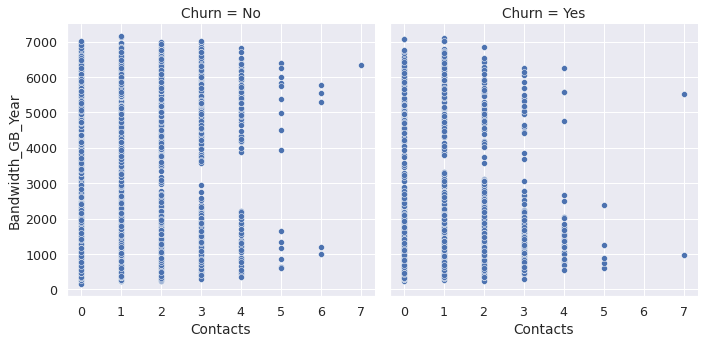

<Figure size 576x288 with 0 Axes>

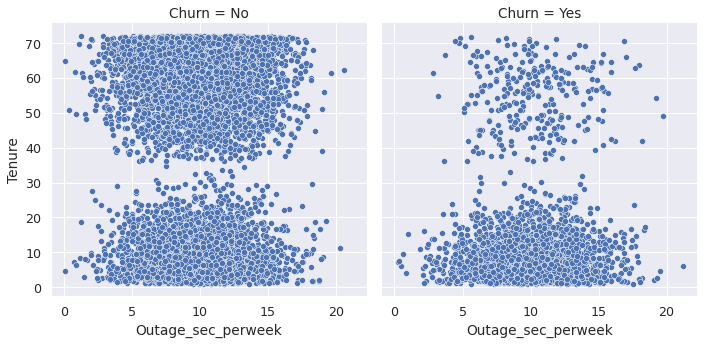

<Figure size 576x288 with 0 Axes>

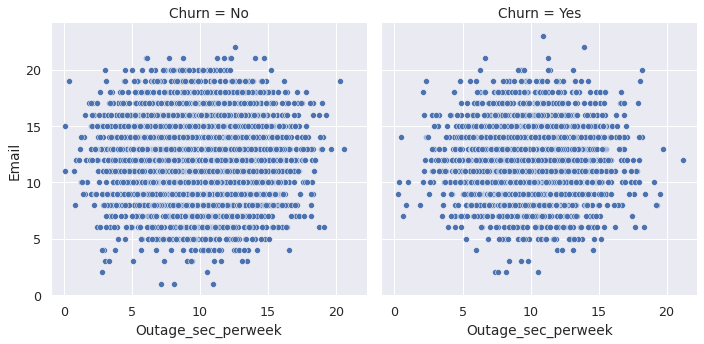

<Figure size 576x288 with 0 Axes>

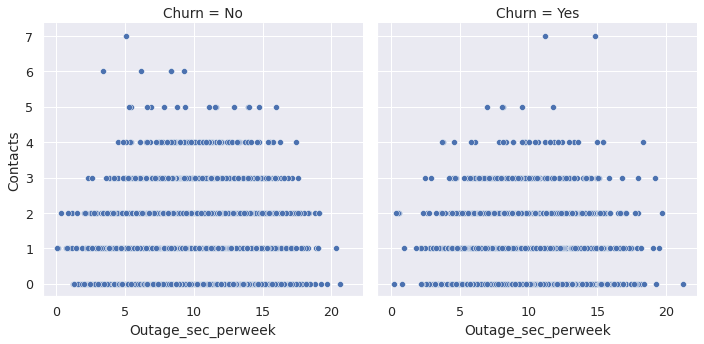

<Figure size 576x288 with 0 Axes>

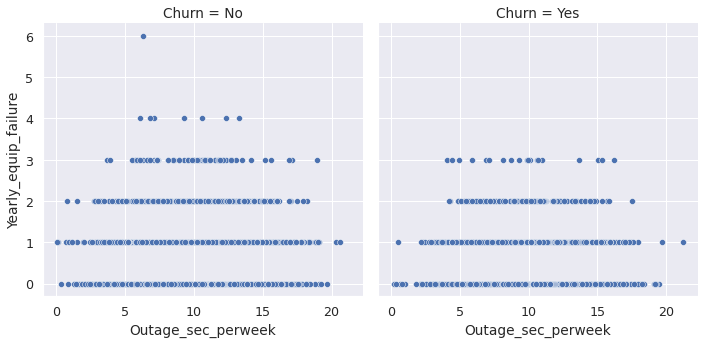

<Figure size 576x288 with 0 Axes>

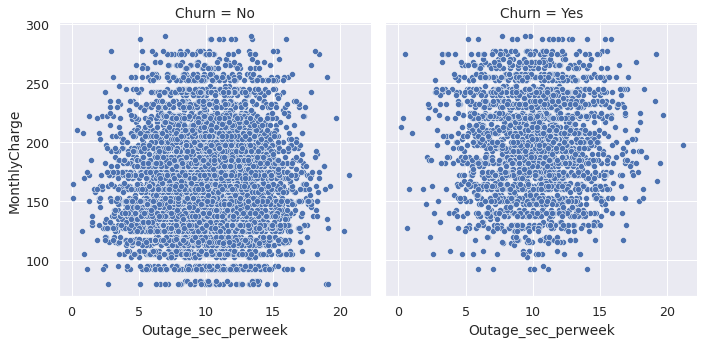

<Figure size 576x288 with 0 Axes>

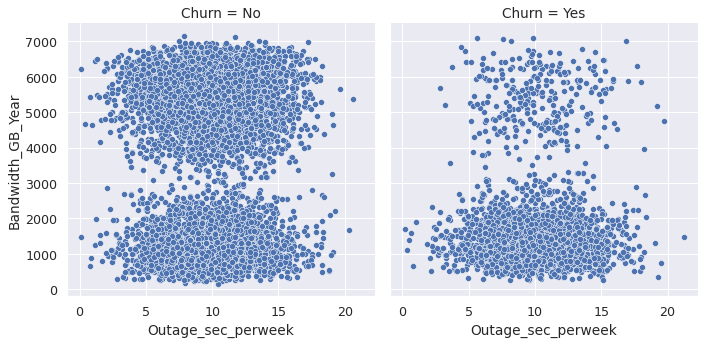

<Figure size 576x288 with 0 Axes>

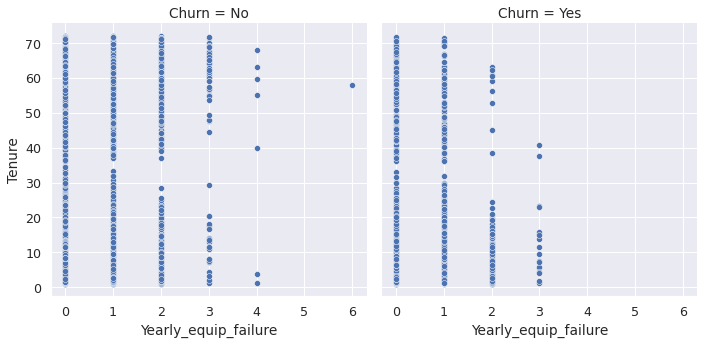

<Figure size 576x288 with 0 Axes>

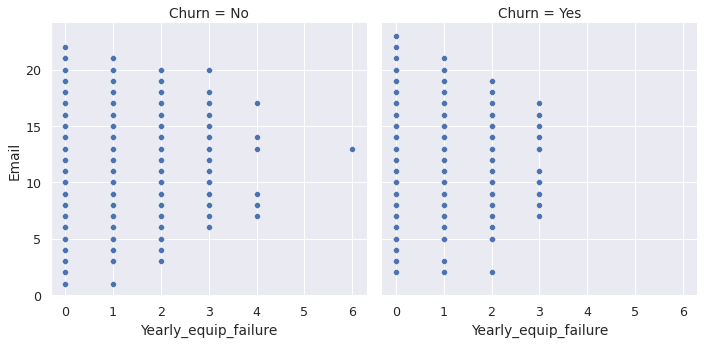

<Figure size 576x288 with 0 Axes>

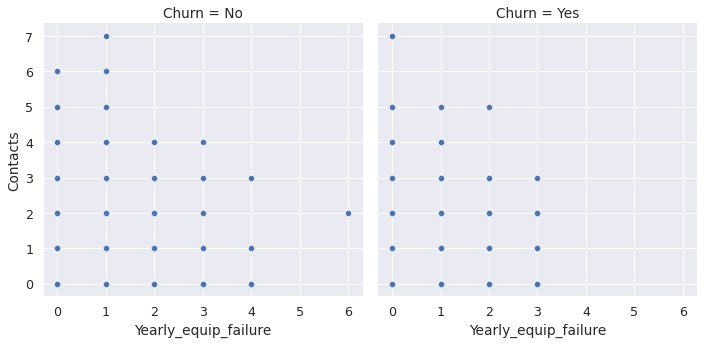

<Figure size 576x288 with 0 Axes>

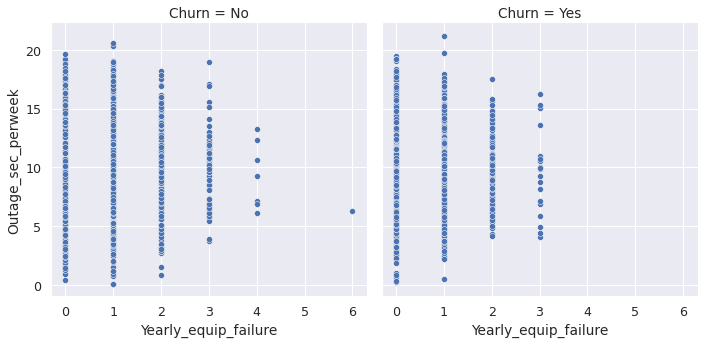

<Figure size 576x288 with 0 Axes>

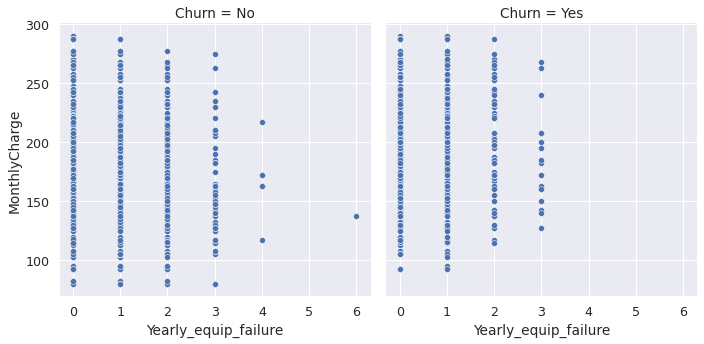

<Figure size 576x288 with 0 Axes>

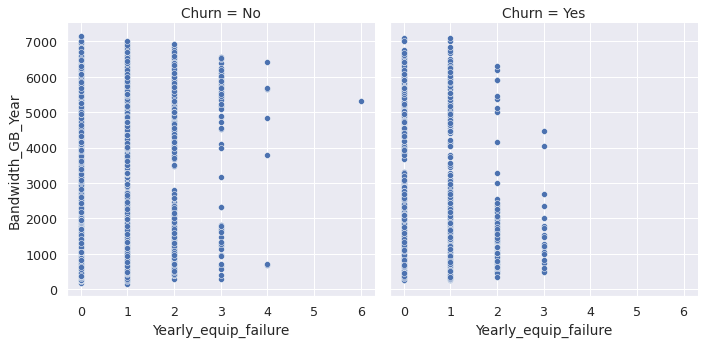

<Figure size 576x288 with 0 Axes>

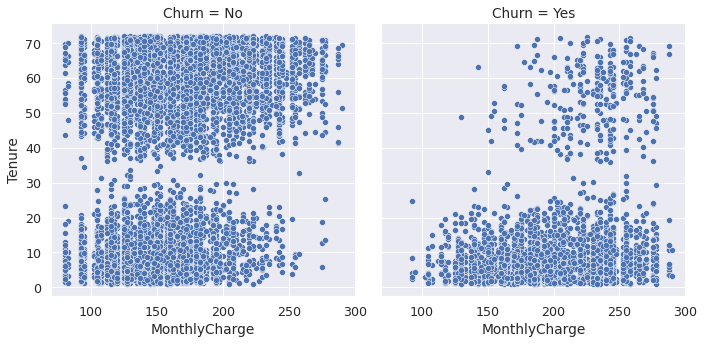

<Figure size 576x288 with 0 Axes>

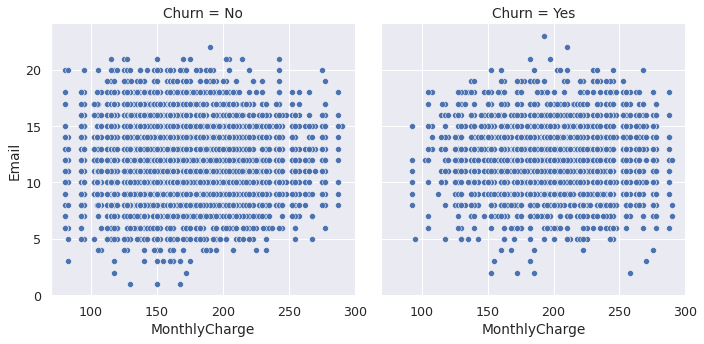

<Figure size 576x288 with 0 Axes>

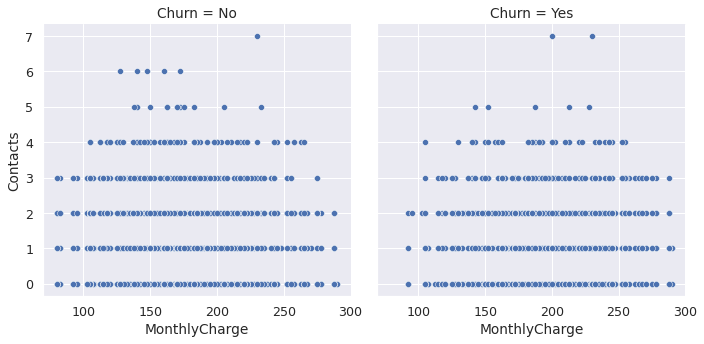

<Figure size 576x288 with 0 Axes>

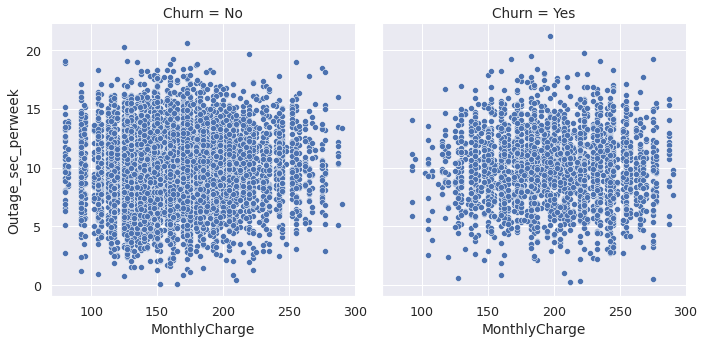

<Figure size 576x288 with 0 Axes>

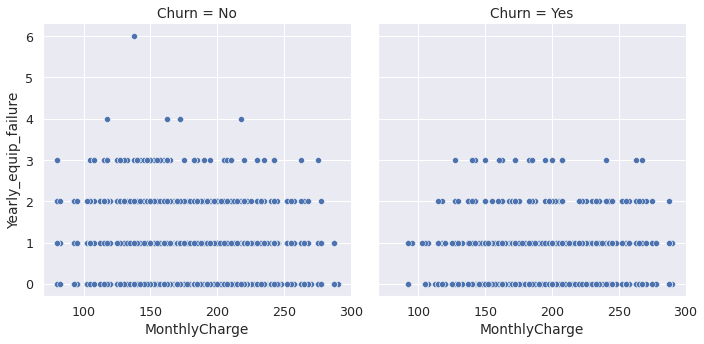

<Figure size 576x288 with 0 Axes>

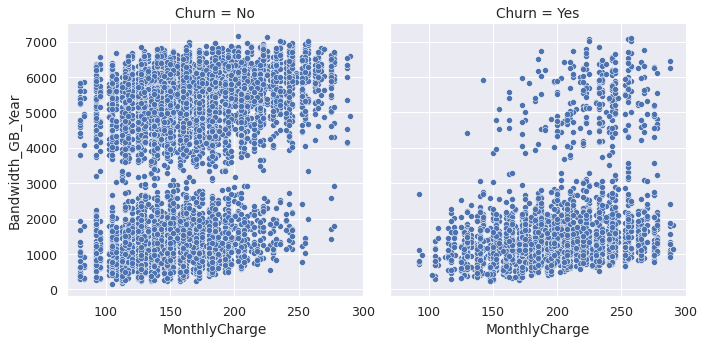

<Figure size 576x288 with 0 Axes>

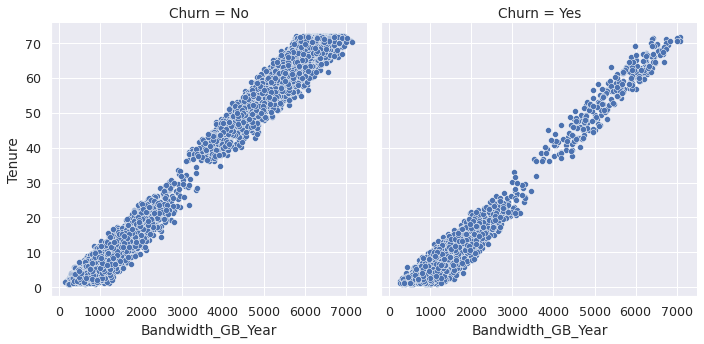

<Figure size 576x288 with 0 Axes>

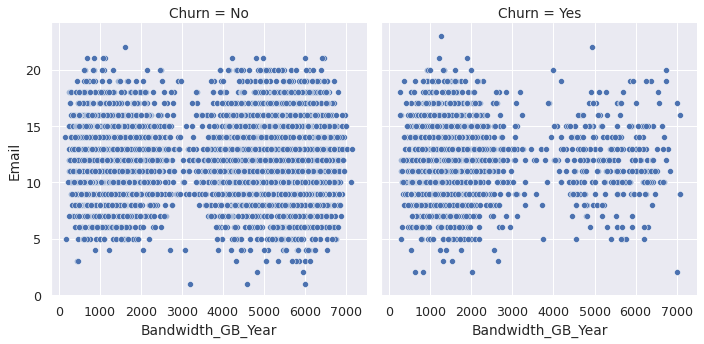

<Figure size 576x288 with 0 Axes>

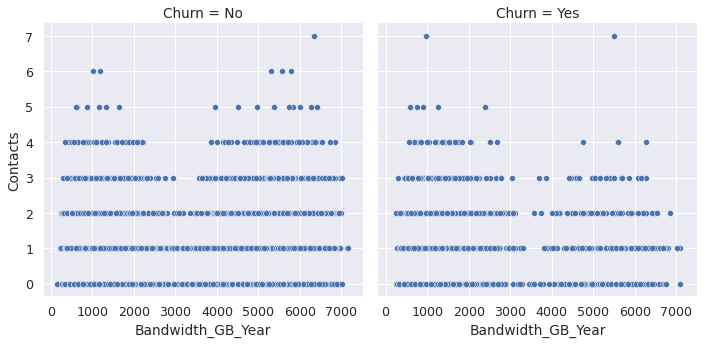

<Figure size 576x288 with 0 Axes>

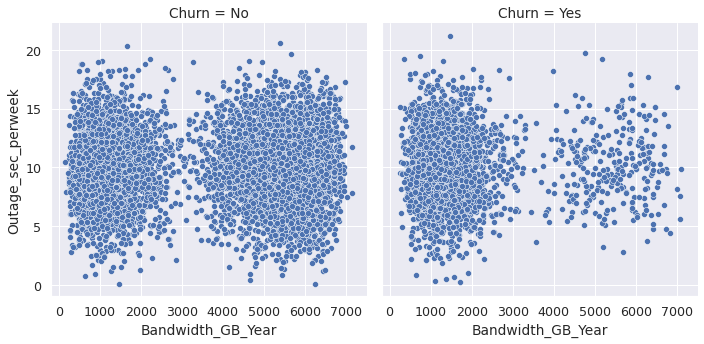

<Figure size 576x288 with 0 Axes>

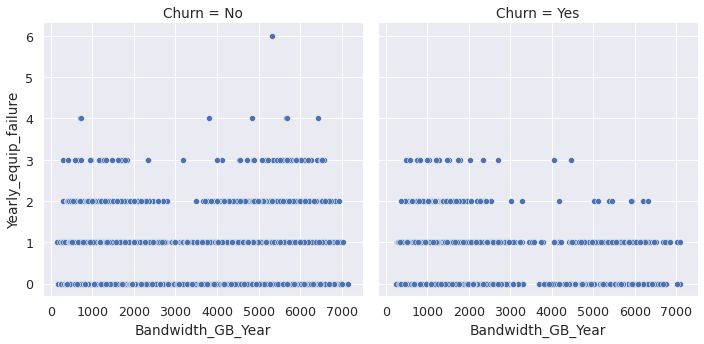

<Figure size 576x288 with 0 Axes>

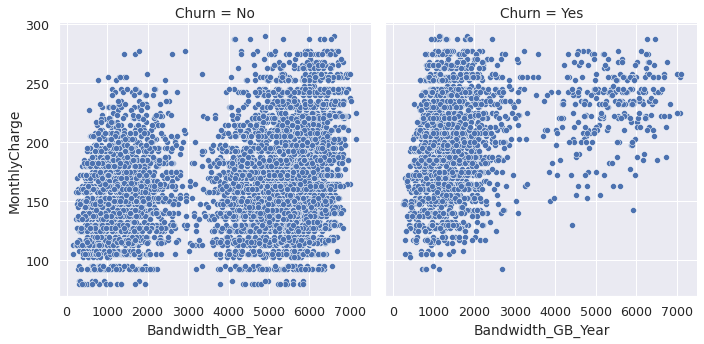

<Figure size 576x288 with 0 Axes>

In [ ]:
for column_x in churn_services_data:
    if churn_services_data[column_x].dtype == object:
        continue
    for column_y in churn_services_data:
        if churn_services_data[column_y].dtype == object:
            continue
        if column_x != column_y:
            sns.relplot(
                x=column_x,
                y=column_y,
                kind='scatter',
                col='Churn',
                data=churn_services_data)
            plt.figure(figsize=(8,4))
            plt.show()